In [1]:
import valenspy as vp
from valenspy.processing import select_region, remap_cdo
from dask.diagnostics import ProgressBar
from pathlib import Path
import xarray as xr
import matplotlib.pyplot as plt
from datatree import DataTree

# Data loading and processing
All the data loading and preprocessing is done using valenspy but in through a submission of the regrid_data.py script. 

# Analysis
By saving the data to a file, we could load the data from here and continue the analysis

In [57]:
dt.to_netcdf("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/ValEnsPy/notebooks/intermediate_data/preprocessed_data_2006_ERA5_all_1011.nc")
# dt.to_zarr("...")

In [2]:
import datatree

dt = datatree.open_datatree("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/ValEnsPy/notebooks/intermediate_data/preprocessed_data_2006_ERA5_all_1004.nc", chunks="auto")

In [3]:
dt

DataTree('None', parent=None)
├── DataTree('obs')
│   └── DataTree('ERA5')
│           Dimensions:  (time: 8736, lat: 141, lon: 221)
│           Coordinates:
│             * lon      (lon) float32 884B -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
│             * lat      (lat) float32 564B 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
│             * time     (time) datetime64[ns] 70kB 2006-01-01 ... 2006-12-30T23:00:00
│           Data variables:
│               tas      (time, lat, lon) float64 2GB dask.array<chunksize=(3504, 55, 87), meta=np.ndarray>
│               pr       (time, lat, lon) float64 2GB dask.array<chunksize=(3504, 55, 87), meta=np.ndarray>
│           Attributes:
│               Conventions:  CF-1.6
│               history:      2020-02-19 04:37:50 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
│               period:       2006
│               freq:         hourly
│               region:       europe
│               dataset:      ERA5
└── DataTree('mod')
    ├── DataTree('ALARO_original')
    │       Dimensions:  (time: 8710, lon: 221, lat: 141)
    │       Coordinates:
    │         * time     (time) datetime64[ns] 70kB 2006-01-02T01:00:00 ... 2006-12-30T23...
    │         * lon      (lon) float64 2kB -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
    │         * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
    │       Data variables:
    │           tas      (time, lat, lon) float32 1GB dask.array<chunksize=(1076, 141, 221), meta=np.ndarray>
    │           pr       (time, lat, lon) float64 2GB dask.array<chunksize=(538, 141, 221), meta=np.ndarray>
    │       Attributes: (12/23)
    │           ey:           13
    │           dy:           12500
    │           projection:   lcc
    │           center_lon:   9.9
    │           origin:       /dodrio/scratch/projects/2022_200/project_output/RMIB-UGent...
    │           dx:           12500
    │           ...           ...
    │           history:      Thu Oct 03 17:16:01 2024: cdo -O -s -f nc -remapbil,/dodrio...
    │           center_lat:   49
    │           validate:     2006-01-02 01:00:00
    │           timestep:     300
    │           basedate:     2006-01-01
    │           proj_R:       6371229
    ├── DataTree('ALARO_GHGs')
    │       Dimensions:  (time: 8734, lon: 221, lat: 141)
    │       Coordinates:
    │         * time     (time) datetime64[ns] 70kB 2006-01-01T01:00:00 ... 2006-12-30T23...
    │         * lon      (lon) float64 2kB -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
    │         * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
    │       Data variables:
    │           tas      (time, lat, lon) float32 1GB dask.array<chunksize=(1076, 141, 221), meta=np.ndarray>
    │           pr       (time, lat, lon) float64 2GB dask.array<chunksize=(538, 141, 221), meta=np.ndarray>
    │       Attributes: (12/23)
    │           ey:           13
    │           dy:           12500
    │           projection:   lcc
    │           center_lon:   9.9
    │           origin:       /dodrio/scratch/projects/2022_200/project_output/RMIB-UGent...
    │           dx:           12500
    │           ...           ...
    │           history:      Wed Oct 02 15:23:13 2024: cdo -O -s -f nc -remapbil,/dodrio...
    │           center_lat:   49
    │           validate:     2006-01-01 01:00:00
    │           timestep:     300
    │           basedate:     2006-01-01
    │           proj_R:       6371229
    ├── DataTree('ALARO_GHGs_v2')
    │       Dimensions:  (time: 8734, lon: 221, lat: 141)
    │       Coordinates:
    │         * time     (time) datetime64[ns] 70kB 2006-01-01T01:00:00 ... 2006-12-30T23...
    │         * lon      (lon) float64 2kB -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
    │         * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
    │       Data variables:
    │           tas      (time, lat, lon) float32 1GB dask.array<chunksize=(107

In [6]:
dt_GHG1 = datatree.open_datatree("/dodrio/scratch/projects/2022_200/project_output/RMIB-UGent/vsc46032_kobe/ValEnsPy/notebooks/intermediate_data/preprocessed_data_2006_ERA5_GHGs_1.nc", chunks="auto")

In [9]:
dt_GHG1

DataTree('None', parent=None)
└── DataTree('mod')
    └── DataTree('ALARO_GHGs_1')
            Dimensions:  (time: 8734, lon: 221, lat: 141)
            Coordinates:
              * time     (time) datetime64[ns] 70kB 2006-01-01T01:00:00 ... 2006-12-30T23...
              * lon      (lon) float64 2kB -15.0 -14.75 -14.5 -14.25 ... 39.5 39.75 40.0
              * lat      (lat) float64 1kB 35.0 35.25 35.5 35.75 ... 69.25 69.5 69.75 70.0
            Data variables:
                tas      (time, lat, lon) float32 1GB dask.array<chunksize=(1076, 141, 221), meta=np.ndarray>
                pr       (time, lat, lon) float64 2GB dask.array<chunksize=(538, 141, 221), meta=np.ndarray>
            Attributes: (12/23)
                ey:           13
                dy:           12500
                projection:   lcc
                center_lon:   9.9
                origin:       /dodrio/scratch/projects/2022_200/project_output/RMIB-UGent...
                dx:           12500
                ...           ...
                history:      Fri Oct 11 10:49:08 2024: cdo -O -s -f nc -remapbil,/dodrio...
                center_lat:   49
                validate:     2006-01-01 01:00:00
                timestep:     300
                basedate:     2006-01-01
                proj_R:       6371229

## Final preparation

### Time issues
Some issues with missing converted timesteps.

The first day and the last month are removed:
- First day due to conversions issues (first day missed for some datasets)
- Last month due to the fact that the last month is not complete for all datasets (CLIM files RMI only generated until 2020-11-30)

In [62]:
#Which timesteps are in ERA5 but not in ALARO_original
import numpy as np

era5 = dt["obs/ERA5"].ds
alaro = dt["mod/ALARO_original"].ds

era5_time = era5.time.values
alaro_time = alaro.time.values

missing_time = era5_time[~np.isin(era5_time, alaro_time)]

print(len(missing_time), missing_time)

3 ['2006-01-02T00:00:00.000000000' '2006-04-01T00:00:00.000000000'
 '2006-10-30T01:00:00.000000000']


Some final preparation before running the diagnostics.
Such as choosing a period of interest, and a domain.

In [4]:
dt = dt.sel(time=slice("2006-01-02","2006-11-30")) #Select only the last three months (here the temporal spin-up is already considered)
# dt = dt.map_over_subtree(select_region, region="europe") #Select region

# Diagnostics
A quick comparison between the data.



### Model2Ref



In [5]:
SpatialBias_ens = vp.Ensemble2Ref.from_model2ref(vp.diagnostic.SpatialBias)

with ProgressBar():
    dt_spatial_bias = SpatialBias_ens.apply(dt.mod, dt["obs/ERA5"].ds).compute()

[                                        ] | 2% Completed | 2.76 s ms

[########################################] | 100% Completed | 24.79 s
[########################################] | 100% Completed | 28.08 s
[########################################] | 100% Completed | 26.14 s
[########################################] | 100% Completed | 25.06 s
[########################################] | 100% Completed | 23.03 s
[########################################] | 100% Completed | 24.32 s


In [15]:
from valenspy.diagnostic.visualizations import plot_map
#Silence UserWarning
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import cartopy.crs as ccrs

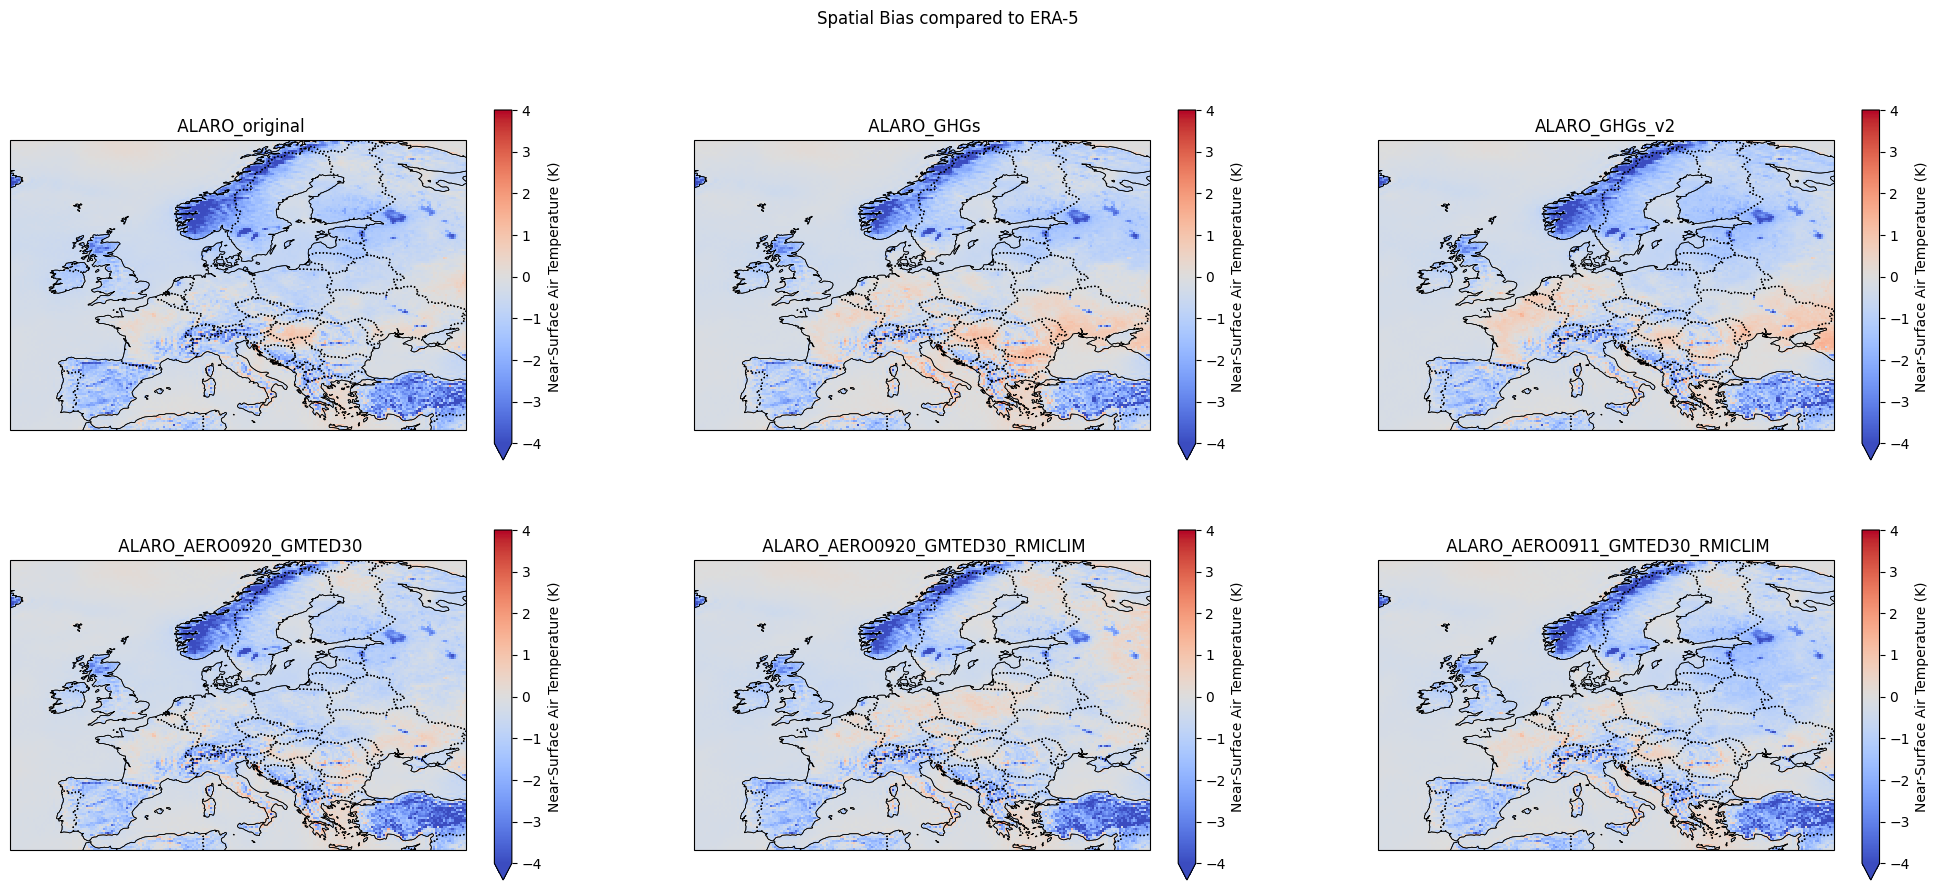

In [6]:

fig, ax = plt.subplots(2,3, figsize=(25,10), subplot_kw={"projection":ccrs.PlateCarree()})
SpatialBias_ens.plot(dt_spatial_bias, axes=ax, variable="tas", facetted=True, robust=True, vmin=-4, vmax=4)
# plot_map(dt.obs.ERA5.ds["tas"].mean("time"), ax=ax[1], cmap="coolwarm", cbar_kwargs={"shrink":0.6})
# ax[1].set_title("ERA-5 mean")
ax[0,2].set_title("ALARO_GHGs_v2")
fig.suptitle("Spatial Bias compared to ERA-5")
plt.show()

In [7]:
SpatialBias_ens = vp.Ensemble2Ref.from_model2ref(vp.diagnostic.SpatialBias)

dt_spatial_bias_list = []
with ProgressBar():
    for i, season in enumerate(["DJF", "MAM", "JJA", "SON"]):
        def select_season(ds, season):
            return ds.sel(time=ds.time.dt.season==season)
        dt_season = dt.map_over_subtree(select_season, season=season)
        dt_spatial_bias_list.append(SpatialBias_ens.apply(dt_season.mod, dt_season["obs/ERA5"].ds).compute())


[########################################] | 100% Completed | 10.22 s
[########################################] | 100% Completed | 9.32 ss
[########################################] | 100% Completed | 8.19 ss
[########################################] | 100% Completed | 8.78 ss
[########################################] | 100% Completed | 7.90 ss
[########################################] | 100% Completed | 7.24 ss
[########################################] | 100% Completed | 9.22 ss
[########################################] | 100% Completed | 8.68 ss
[########################################] | 100% Completed | 12.16 s
[########################################] | 100% Completed | 8.76 ss
[########################################] | 100% Completed | 10.01 s
[########################################] | 100% Completed | 10.01 s
[########################################] | 100% Completed | 11.25 s
[########################################] | 100% Completed | 9.41 ss
[###################

In [8]:
def subset_data_tree(dt, paths):
    matching_nodes = {node.path: node.ds for node in dt.subtree if node.path in paths}
    return DataTree.from_dict(matching_nodes, name=dt.root.name)

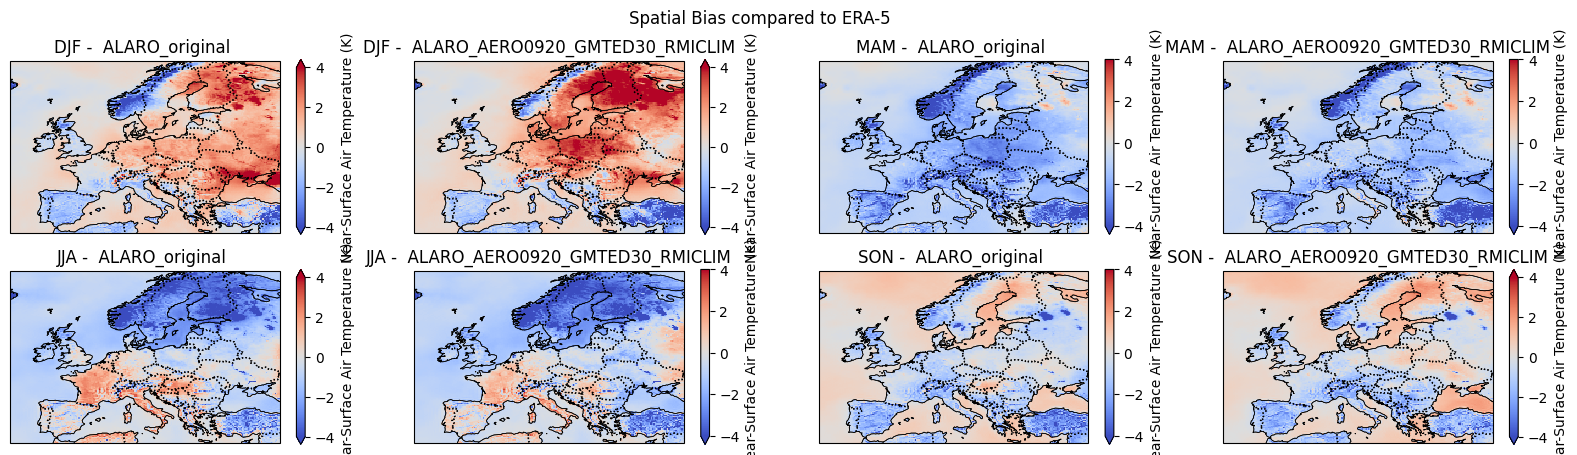

In [9]:
fig, ax = plt.subplots(2,4, figsize=(20,5), subplot_kw={"projection":ccrs.PlateCarree()})
flat_ax = ax.flatten()
#Split up the dt_spatial_bias per season
for dt, season,i in zip(dt_spatial_bias_list, ["DJF", "MAM", "JJA", "SON"], range(0,8,2)):
    dt_subset = subset_data_tree(dt, ["/ALARO_original", "/ALARO_AERO0920_GMTED30_RMICLIM"])
    SpatialBias_ens.plot(dt_subset, axes=flat_ax[i:i+2], variable="tas", facetted=True, robust=True, vmin=-4, vmax=4)
    #Add the Season to the existing title
    flat_ax[i].set_title(f"{season} - {flat_ax[i].get_title()} ")
    flat_ax[i+1].set_title(f"{season} - {flat_ax[i+1].get_title()}")

fig.suptitle("Spatial Bias compared to ERA-5")
plt.show()

In [12]:
SpatialBias_ens = vp.Ensemble2Ref.from_model2ref(vp.diagnostic.SpatialBias)

with ProgressBar():
    dt_spatial_bias_ALARO = SpatialBias_ens.apply(dt.mod, dt["mod/ALARO_original"].ds).compute()

[########################################] | 100% Completed | 23.61 s
[########################################] | 100% Completed | 33.12 s
[########################################] | 100% Completed | 32.08 s
[########################################] | 100% Completed | 34.56 s
[########################################] | 100% Completed | 36.70 s
[########################################] | 100% Completed | 41.51 s
[########################################] | 100% Completed | 41.85 s


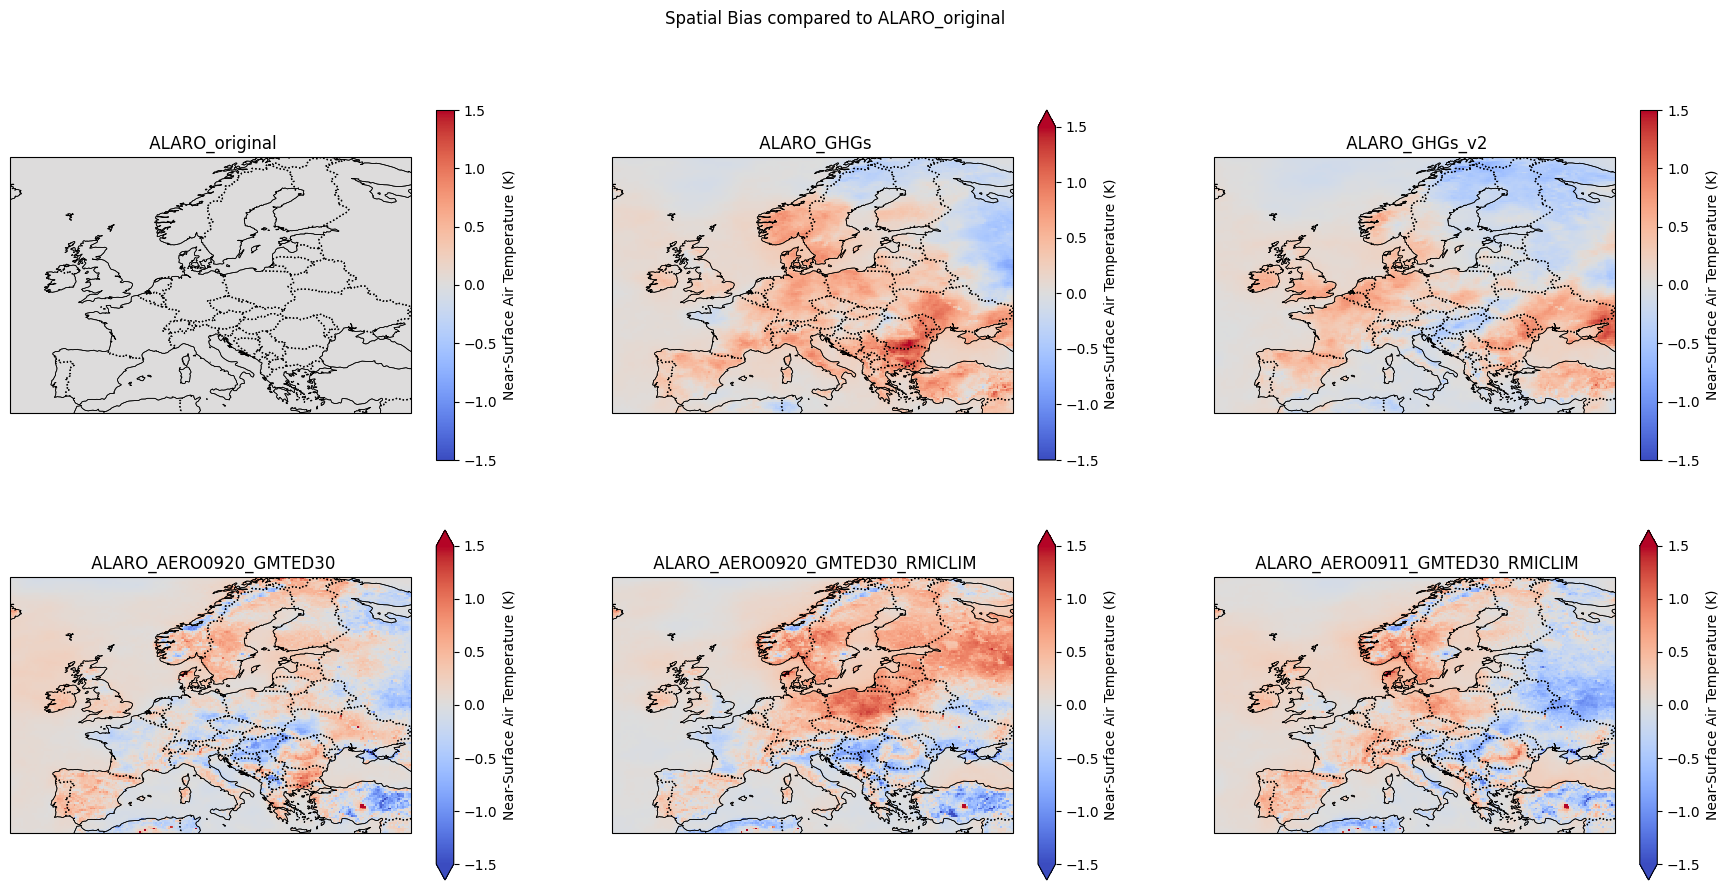

In [66]:
fig, ax = plt.subplots(2,3, figsize=(22,10), subplot_kw={"projection":ccrs.PlateCarree()})
SpatialBias_ens.plot(dt_spatial_bias_ALARO, axes=ax, variable="tas", facetted=True, robust=True, vmin=-1.5, vmax=1.5)
# plot_map(dt.obs.ERA5.ds["tas"].mean("time"), ax=ax[1], cmap="coolwarm", cbar_kwargs={"shrink":0.6})
# ax[1].set_title("ERA-5 mean")
fig.suptitle("Spatial Bias compared to ALARO_original")
plt.show()

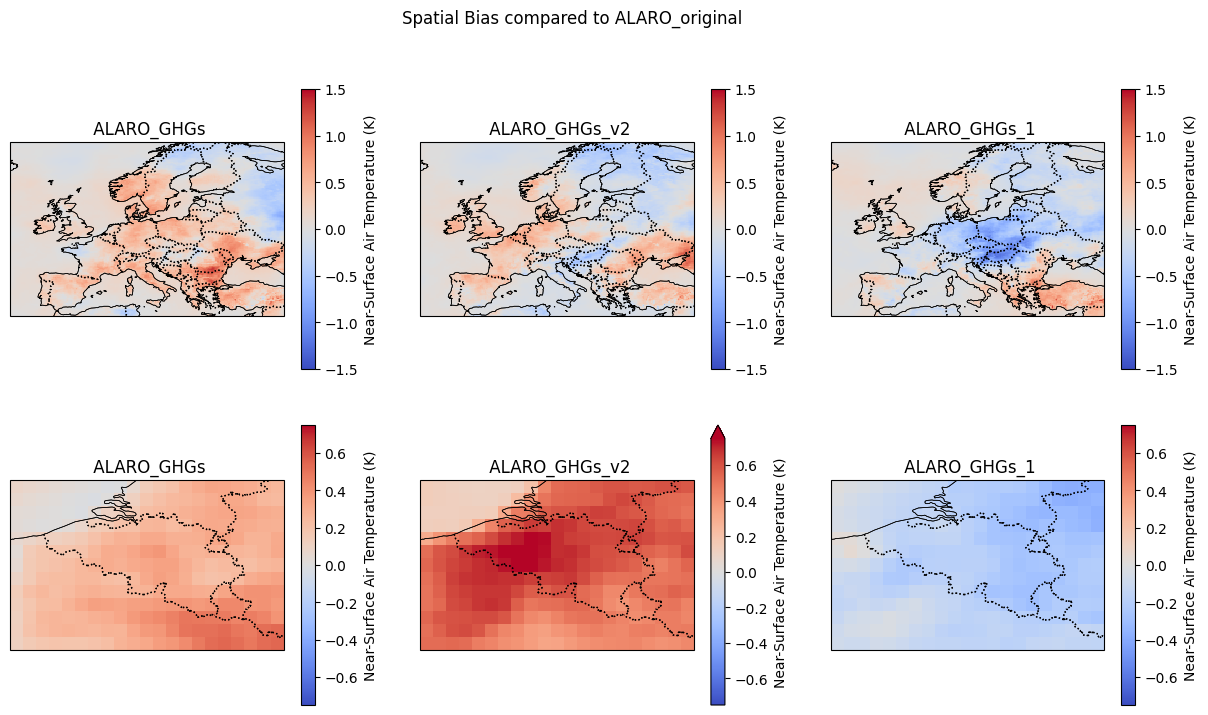

In [17]:
#TODO: Add GHGs_TRIPLE

fig, ax = plt.subplots(2,3, figsize=(15,8), subplot_kw={"projection":ccrs.PlateCarree()})
flat_ax = ax.flatten()
SpatialBias_ens.plot(dt_spatial_bias_ALARO.match("*/*GHGs*"), axes=flat_ax[0:3], variable="tas", facetted=True, robust=True, vmin=-1.5, vmax=1.5)
dt_bel = dt_spatial_bias_ALARO.map_over_subtree(select_region, region="belgium")
SpatialBias_ens.plot(dt_bel.match("*/*GHGs*"), axes=flat_ax[3:6], variable="tas", facetted=True, robust=True, vmin=-0.75, vmax=0.75)
# plot_map(dt.obs.ERA5.ds["tas"].mean("time"), ax=ax[1], cmap="coolwarm", cbar_kwargs={"shrink":0.6})
# ax[1].set_title("ERA-5 mean")
fig.suptitle("Spatial Bias compared to ALARO_original")
plt.show()

In [45]:
SpatialBias_ens = vp.Ensemble2Ref.from_model2ref(vp.diagnostic.SpatialBias)

with ProgressBar():
    dt_spatial_bias_ALARO_AERO = SpatialBias_ens.apply(dt.mod.match("*/*AERO*RMICLIM*"), dt["mod/ALARO_AERO0920_GMTED30_RMICLIM"].ds).compute()

[########################################] | 100% Completed | 22.70 s
[########################################] | 100% Completed | 21.27 s


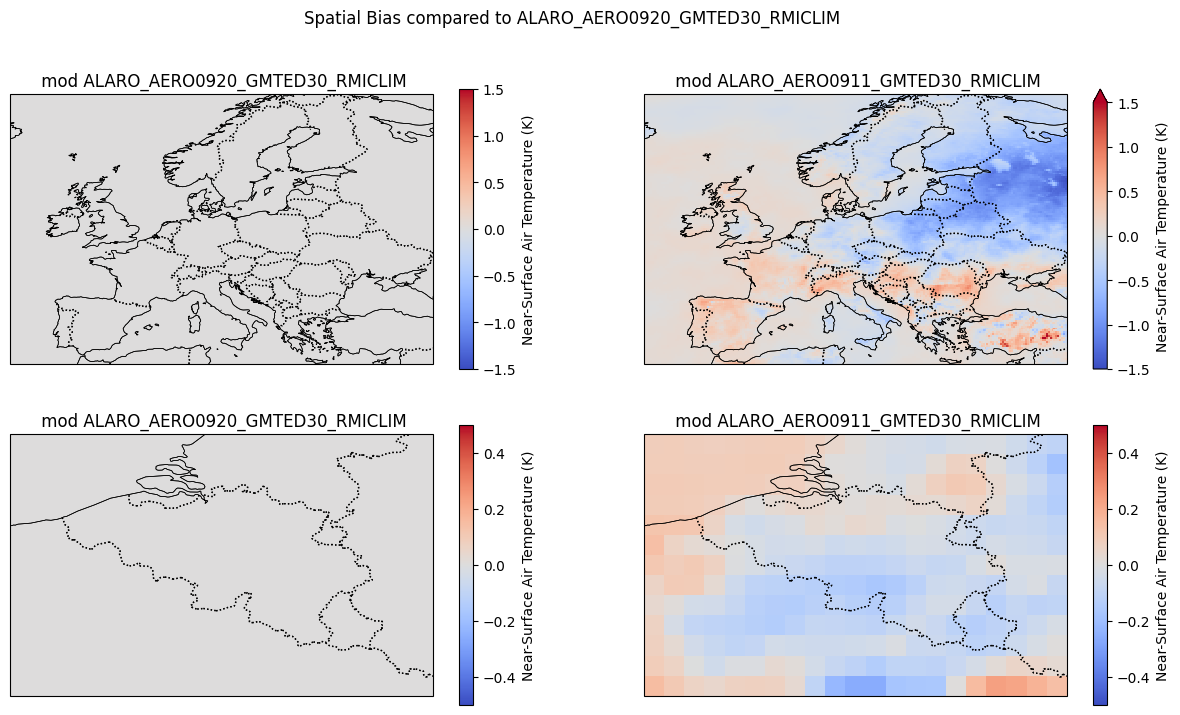

In [69]:
from valenspy.diagnostic.visualizations import plot_map
import cartopy.crs as ccrs
fig, ax = plt.subplots(2,2, figsize=(15,8), subplot_kw={"projection":ccrs.PlateCarree()})
flat_axes = ax.flatten()
SpatialBias_ens.plot(dt_spatial_bias_ALARO_AERO, axes=flat_axes[0:2], variable="tas", facetted=True, robust=True, vmin=-1.5, vmax=1.5)
dt_bel = dt_spatial_bias_ALARO_AERO.map_over_subtree(select_region, region="belgium")
SpatialBias_ens.plot(dt_bel, axes=flat_axes[2:4], variable="tas", facetted=True, robust=True, vmin=-0.5, vmax=0.5)
# plot_map(dt.obs.ERA5.ds["tas"].mean("time"), ax=ax[1], cmap="coolwarm", cbar_kwargs={"shrink":0.6})
# ax[1].set_title("ERA-5 mean")
fig.suptitle("Spatial Bias compared to ALARO_AERO0920_GMTED30_RMICLIM")
plt.show()

### Model2Self
Some diagnostics to compare the model to itself
### Diurnal cycle

In [28]:
DiurnalCycle_ens = vp.Ensemble2Self.from_model2self(vp.diagnostic.DiurnalCycle)
with ProgressBar():
    dt_diurnal_cycle = DiurnalCycle_ens.apply(dt).compute()

[########################################] | 100% Completed | 5.17 ss
[########################################] | 100% Completed | 1.22 sms
[########################################] | 100% Completed | 1.53 sms
[########################################] | 100% Completed | 1.65 sms
[########################################] | 100% Completed | 3.31 sms


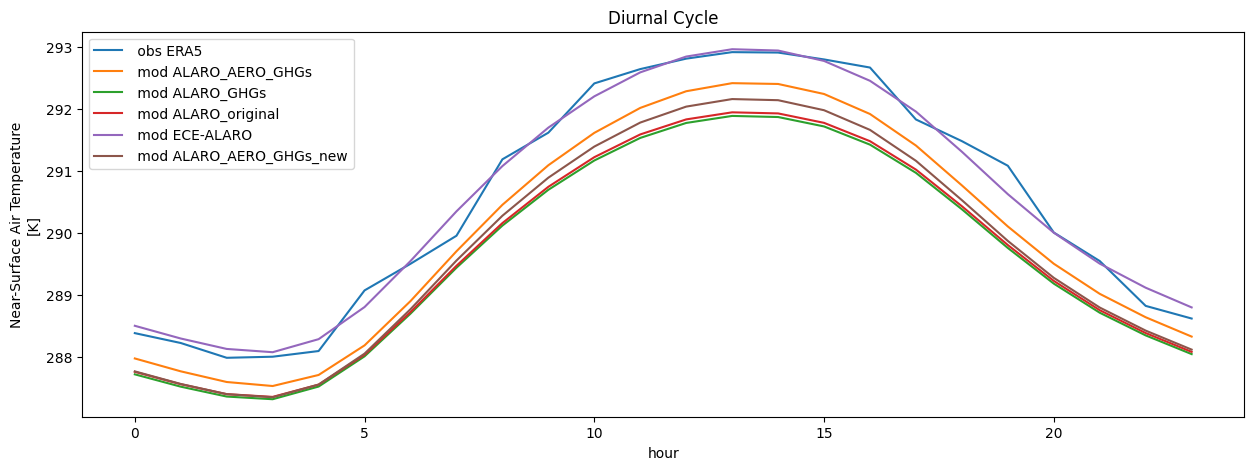

In [29]:
fig,ax = plt.subplots(1,1, figsize=(15,5))
DiurnalCycle_ens.plot(dt_diurnal_cycle, facetted=False, variable="tas", axes=ax)
plt.legend()

### Time series

In [84]:
from valenspy.diagnostic import TimeSeriesSpatialMean
TimeSeriesSpatialMean_ens = vp.Ensemble2Self.from_model2self(TimeSeriesSpatialMean)

with ProgressBar():
    dt_ts = TimeSeriesSpatialMean_ens.apply(dt).compute()

[########################################] | 100% Completed | 9.18 ss
[########################################] | 100% Completed | 18.34 s
[########################################] | 100% Completed | 19.14 s
[########################################] | 100% Completed | 16.53 s
[########################################] | 100% Completed | 16.26 s
[########################################] | 100% Completed | 15.96 s
[########################################] | 100% Completed | 15.55 s


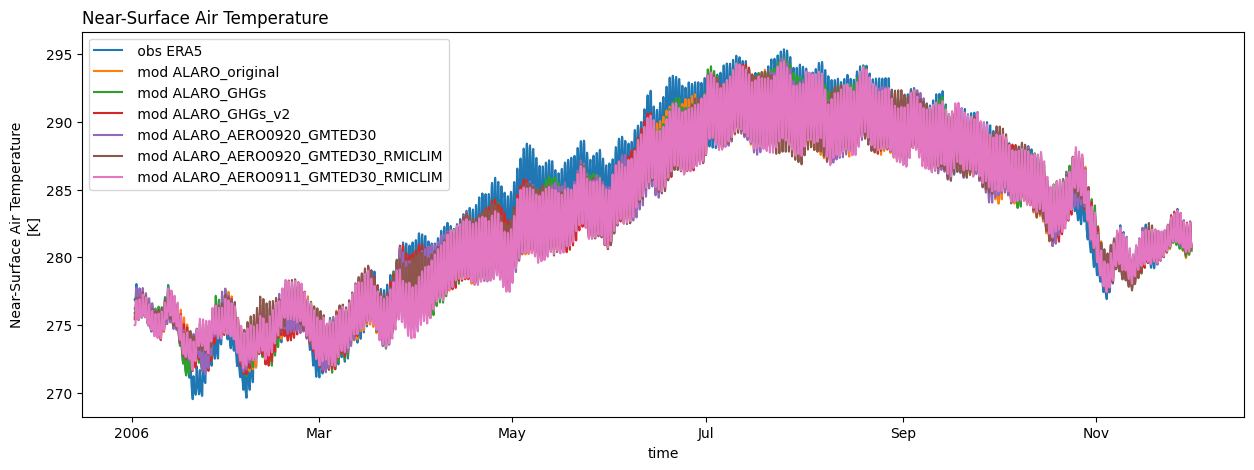

In [85]:
fig,ax = plt.subplots(1,1, figsize=(15,5))
TimeSeriesSpatialMean_ens.plot(dt_ts, variable="tas", axes=ax, facetted=False)
plt.legend()
plt.show()

## Point analysis

<GeoAxes: title={'right': 'Location of points'}>

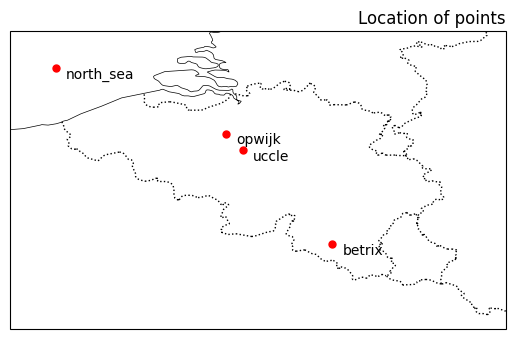

In [86]:
from valenspy.processing.select import select_point
from valenspy.diagnostic.visualizations import plot_points_on_map

d_point_coords = {
    'opwijk'    : (4.18, 50.97), 
    'betrix'    : (5.25, 49.854),
    'north_sea' : (2.465, 51.63),
    'uccle'     : (4.35, 50.8),
}

point_id = "uccle"
point_coord = d_point_coords[point_id]

plot_points_on_map(d_point_coords, region="belgium")

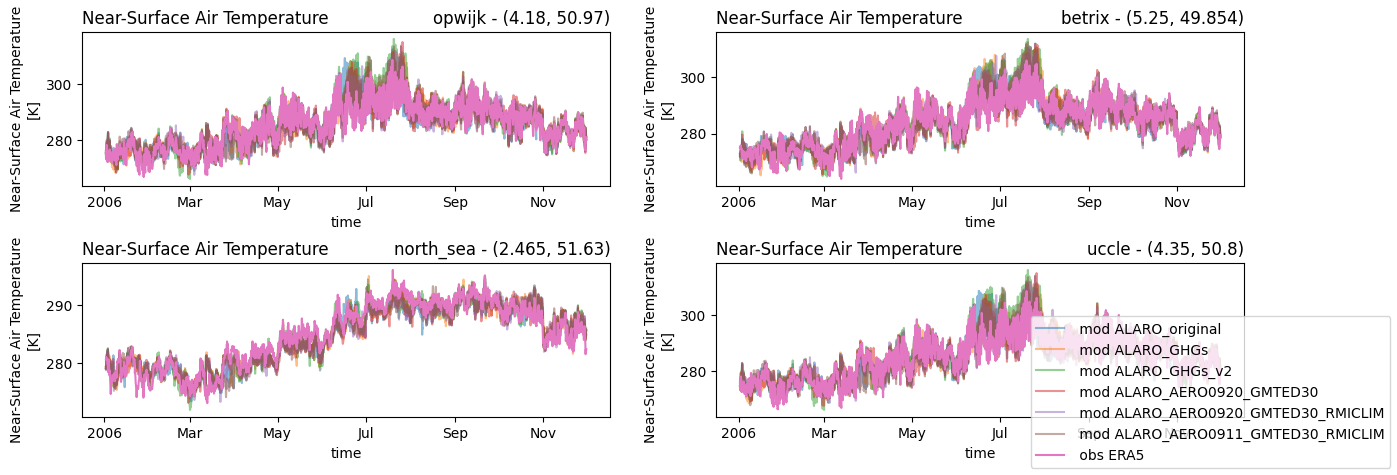

In [87]:
from valenspy.diagnostic import TimeSeriesSpatialMean
TimeSeriesSpatialMean_ens = vp.Ensemble2Self.from_model2self(TimeSeriesSpatialMean)

fig, axes = plt.subplots(2,2 , figsize=(15,5))
for point, ax in zip(d_point_coords.keys(), axes.flatten()):
    dt_point = dt.map_over_subtree(select_point, (d_point_coords[point][0], d_point_coords[point][1]))
    TimeSeriesSpatialMean_ens.plot(dt_point.mod, variable="tas", axes=ax, facetted=False, alpha=0.5)
    TimeSeriesSpatialMean_ens.plot(dt_point.obs, variable="tas", axes=ax, facetted=False)
    ax.set_title(f"{point} - ({d_point_coords[point][0]}, {d_point_coords[point][1]})", loc="right")

#Add legend
handles, labels = ax.get_legend_handles_labels()
fig.subplots_adjust(hspace=0.5)
fig.legend(handles, labels, loc='lower right')

#Add the plot_points_on_map(d_point_coords, region="belgium") to the plot in the top right corner

plt.show()

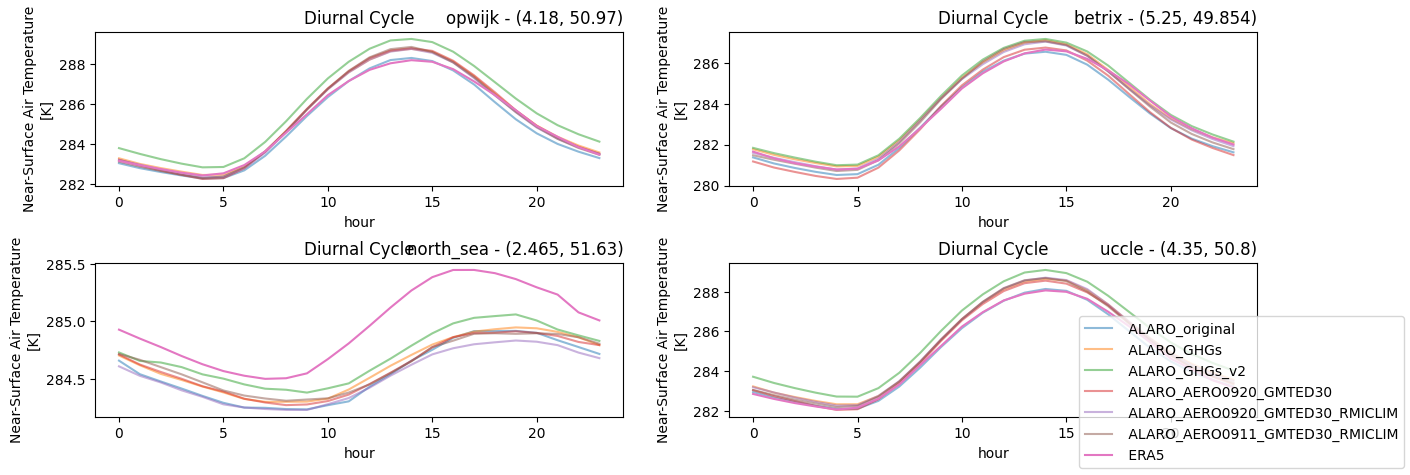

In [96]:
from valenspy.diagnostic import TimeSeriesSpatialMean
DiurnalCycle_ens = vp.Ensemble2Self.from_model2self(vp.diagnostic.DiurnalCycle)

fig, axes = plt.subplots(2,2 , figsize=(15,5))
for point, ax in zip(d_point_coords.keys(), axes.flatten()):
    dt_point = dt.map_over_subtree(select_point, (d_point_coords[point][0], d_point_coords[point][1]))
    DiurnalCycle_ens.plot(DiurnalCycle_ens.apply(dt_point.mod), variable="tas", axes=ax, facetted=False, alpha=0.5)
    DiurnalCycle_ens.plot(DiurnalCycle_ens.apply(dt_point.obs), variable="tas", axes=ax, facetted=False)
    ax.set_title(f"{point} - ({d_point_coords[point][0]}, {d_point_coords[point][1]})", loc="right")

#Add legend
handles, labels = ax.get_legend_handles_labels()
fig.subplots_adjust(hspace=0.5)
fig.legend(handles, labels, loc='lower right')

plt.show()

## Heat waves
- July 12 to 19, 2006


In [103]:
period = slice("2006-07-12","2006-07-24")

<xarray.Dataset> Size: 192kB
Dimensions:  (time: 7992)
Coordinates:
    lon      float32 4B 4.25
    lat      float32 4B 50.75
  * time     (time) datetime64[ns] 64kB 2006-01-02 ... 2006-11-30T23:00:00
Data variables:
    tas      (time) float64 64kB dask.array<chunksize=(3480,), meta=np.ndarray>
    pr       (time) float64 64kB dask.array<chunksize=(3480,), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-02-19 04:37:50 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...
    period:       2006
    freq:         hourly
    region:       europe
    dataset:      ERA5

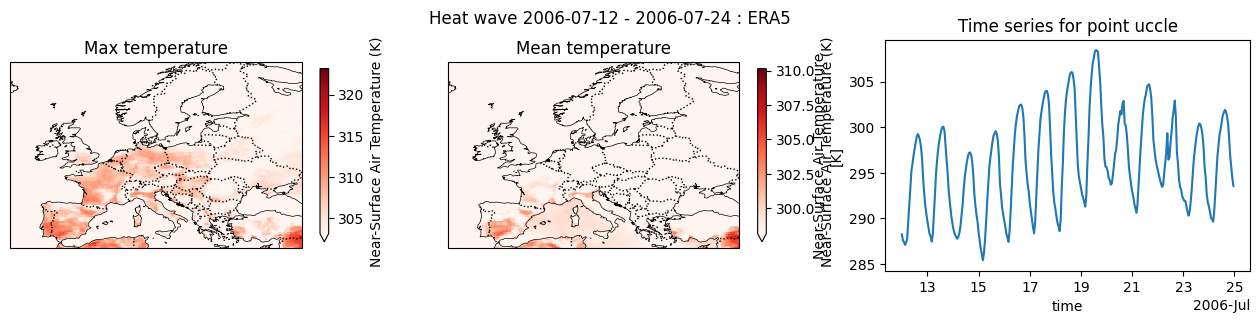

In [132]:
#Draw heat wave statistics for the given week.
ds = dt["obs/ERA5"].ds
ds_points = select_point(ds, point_coord)
ds_points
from valenspy.diagnostic.visualizations import plot_map
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(16,3))

ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree())
plot_map(ds["tas"].sel(time=period).max("time"), ax=ax1, cbar_kwargs={"shrink":0.75}, cmap = "Reds", vmin=303.15, vmax=323.15)
ax1.set_title("Max temperature")

ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree())
plot_map(ds["tas"].sel(time=period).mean("time"), ax=ax2, cbar_kwargs={"shrink":0.75}, cmap = "Reds", vmin=298.15, vmax=310.15)
ax2.set_title("Mean temperature")

ax3 = fig.add_subplot(133)
ds_points["tas"].sel(time=period).plot(ax=ax3)
ax3.set_title(f"Time series for point {point_id}")

#Add a figure title
fig.suptitle(f"Heat wave {period.start} - {period.stop} : ERA5")

plt.show()


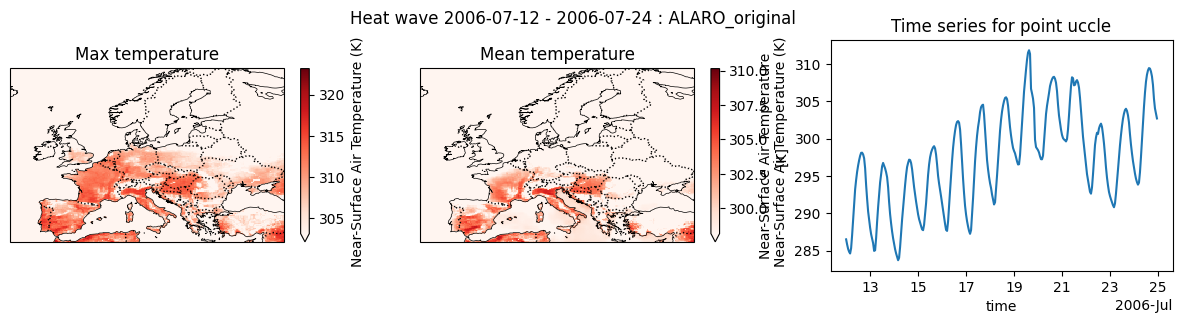

In [133]:
ds = dt["mod/ALARO_original"].ds
ds_points = select_point(ds, point_coord)
ds_points

fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree())
plot_map(ds["tas"].sel(time=period).max("time"), ax=ax1, cbar_kwargs={"shrink":0.75}, cmap = "Reds", vmin=303.15, vmax=323.15)
ax1.set_title("Max temperature")

ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree())
plot_map(ds["tas"].sel(time=period).mean("time"), ax=ax2, cbar_kwargs={"shrink":0.75}, cmap = "Reds", vmin=298.15, vmax=310.15)
ax2.set_title("Mean temperature")

ax3 = fig.add_subplot(133)
ds_points["tas"].sel(time=period).plot(ax=ax3)
ax3.set_title(f"Time series for point {point_id}")

fig.suptitle(f"Heat wave {period.start} - {period.stop} : ALARO_original")

plt.show()

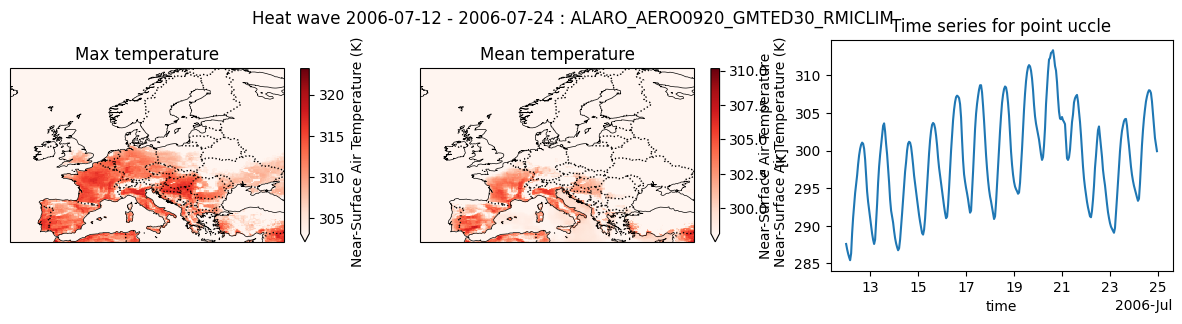

In [134]:
ds = dt["mod/ALARO_AERO0911_GMTED30_RMICLIM"].ds
ds_points = select_point(ds, point_coord)
ds_points

fig = plt.figure(figsize=(15,3))

ax1 = fig.add_subplot(131, projection=ccrs.PlateCarree())
plot_map(ds["tas"].sel(time=period).max("time"), ax=ax1, cbar_kwargs={"shrink":0.75}, cmap = "Reds", vmin=303.15, vmax=323.15)
ax1.set_title("Max temperature")

ax2 = fig.add_subplot(132, projection=ccrs.PlateCarree())
plot_map(ds["tas"].sel(time=period).mean("time"), ax=ax2, cbar_kwargs={"shrink":0.75}, cmap = "Reds", vmin=298.15, vmax=310.15)
ax2.set_title("Mean temperature")

ax3 = fig.add_subplot(133)
ds_points["tas"].sel(time=period).plot(ax=ax3)
ax3.set_title(f"Time series for point {point_id}")

fig.suptitle(f"Heat wave {period.start} - {period.stop} : ALARO_AERO0920_GMTED30_RMICLIM")

plt.show()